<h2>Name : Anuj Jagannath Said<br>
Roll number : ME21b172</h2>

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Helper class to perform fitting data along with cross validation of hyperparameters for
# 'SVC','Logistic Regression','Decision Tree Classifier' classifiers.

class Predictors:
    def __init__(self):
        self.models = []
        self.models_names = ['SVC','Logistic Regression','Decision Tree Classifier']
        parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[0.01,1, 10, 100,1000]}
        svc = SVC()
        self.models.append(GridSearchCV(svc, parameters,n_jobs=-1,scoring="f1_macro"))

        parameters = {
            'C': [0.0001,0.001,0.01, 0.1],  
            'penalty': ['l1', 'l2'], 
            'solver': ['liblinear', 'saga'], 
            'max_iter': [100, 200]  
        }
        log = LogisticRegression(random_state=42)
        self.models.append(GridSearchCV(log, parameters,n_jobs=-1,scoring="f1_macro"))

        parameters = {
            'max_depth': [3, 5, 10, 15, 20], 
            'min_samples_leaf': [1, 2, 4, 6, 8],
        }
        DT = DecisionTreeClassifier(random_state=42)
        self.models.append(GridSearchCV(DT, parameters,n_jobs=-1,scoring="f1_macro"))

    def fit(self,X,y,sample_weight=None):
        for model in self.models:
            model.fit(X,y,sample_weight = sample_weight)

    def predict(self,X_test,y_test):
        for i in range(len(self.models)):
            model = self.models[i]
            name = self.models_names[i] 
            print('For model ' +str(name)+' following are the best parametrs ' + str(model.best_params_))
            y_pred = model.predict(X_test)
            y_pred = model.best_estimator_.predict(X_test)
            cf_matrix = confusion_matrix(y_test, y_pred)
            print(classification_report(y_test,y_pred))
            accuracy_validation = '{}'.format(f1_score(y_test,y_pred,average='macro'))
            print("Macro F1 score of the model on test dataset turns out to be " +accuracy_validation) 
            fig, ax = plt.subplots(figsize=(4,4)) 
            s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax)
            s.set(xlabel='Predicted Label', ylabel='True Label',title='Model = '+str(name))
            plt.plot()

In [22]:
# Data processing
data = pd.read_csv('aps_failure_training_set.csv')
data = data.replace('na',np.NaN)
data[data.columns[0]].replace({'neg':'0','pos':'1'},inplace=True)
data[data.columns[0]] = data[data.columns[0]].astype(float)
data[data.columns[1:]] = data[data.columns[1:]].astype(float)
data.dropna(inplace=True)

In [23]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,0.0,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,0.0,97000.0,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,0.0,124656.0,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,1.0,281324.0,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,1.0,43482.0,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [24]:
# Creating and splitting data 
y = data[data.columns[0]]
X = data[data.columns[1:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [25]:
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[1e2,1e3,1e4]}
svc = SVC()
clf_svc = GridSearchCV(svc, parameters,n_jobs=-1,scoring="f1_macro")
clf_svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100.0, 1000.0, 10000.0],
                         'kernel': ('linear', 'rbf', 'sigmoid')},
             scoring='f1_macro')

In [26]:
print(clf_svc.best_params_)

{'C': 1000.0, 'kernel': 'rbf'}


In [27]:
parameters = {
    'C': [0.0001,0.001,0.01],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200]  
}
log = LogisticRegression(random_state=42)
clf_log = GridSearchCV(log, parameters,n_jobs=-1,scoring="f1_macro")
clf_log.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1_macro')

In [28]:
print(clf_log.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [29]:
parameters = {
    'max_depth': [3, 5, 10, 15, 20], 
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

DT = DecisionTreeClassifier(random_state=42)
clf_dt = GridSearchCV(DT, parameters,n_jobs=-1,scoring='f1_macro')
clf_dt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6, 8]},
             scoring='f1_macro')

In [30]:
print(clf_dt.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1}


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        76
         1.0       1.00      0.62      0.76        13

    accuracy                           0.94        89
   macro avg       0.97      0.81      0.87        89
weighted avg       0.95      0.94      0.94        89

Macro F1 score of the SVC on test dataset turns out to be 0.8650288140734002


[Text(0.5, 14.722222222222216, 'Predicted Label'),
 Text(20.72222222222222, 0.5, 'True Label')]

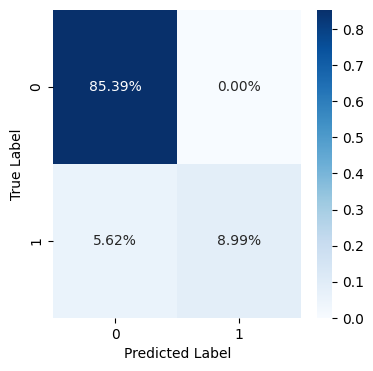

In [31]:
y_pred_svc = clf_svc.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_svc)
print(classification_report(y_test,y_pred_svc))
accuracy_validation = '{}'.format(f1_score(y_test,y_pred_svc,average='macro'))
print("Macro F1 score of the SVC on test dataset turns out to be " +accuracy_validation) 
fig, ax = plt.subplots(figsize=(4,4)) 
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax)
s.set(xlabel='Predicted Label', ylabel='True Label')

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        76
         1.0       0.91      0.77      0.83        13

    accuracy                           0.96        89
   macro avg       0.94      0.88      0.90        89
weighted avg       0.95      0.96      0.95        89

Macro F1 score of the LogReg on test dataset turns out to be 0.9036796536796536


[Text(0.5, 14.722222222222216, 'Predicted Label'),
 Text(20.72222222222222, 0.5, 'True Label')]

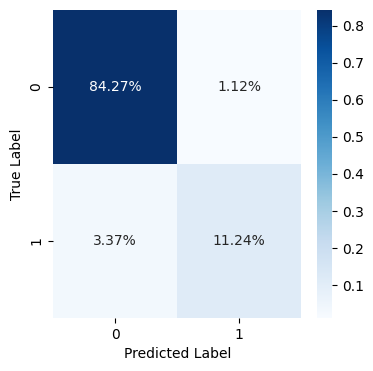

In [32]:
y_pred_log = clf_log.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_log)
print(classification_report(y_test,y_pred_log))
accuracy_validation = '{}'.format(f1_score(y_test,y_pred_log,average='macro'))
print("Macro F1 score of the LogReg on test dataset turns out to be " +accuracy_validation) 
fig, ax = plt.subplots(figsize=(4,4)) 
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax)
s.set(xlabel='Predicted Label', ylabel='True Label')

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        76
         1.0       1.00      0.62      0.76        13

    accuracy                           0.94        89
   macro avg       0.97      0.81      0.87        89
weighted avg       0.95      0.94      0.94        89

Macro F1 score of the Decision Trees on test dataset turns out to be 0.8650288140734002


[Text(0.5, 14.722222222222216, 'Predicted Label'),
 Text(20.72222222222222, 0.5, 'True Label')]

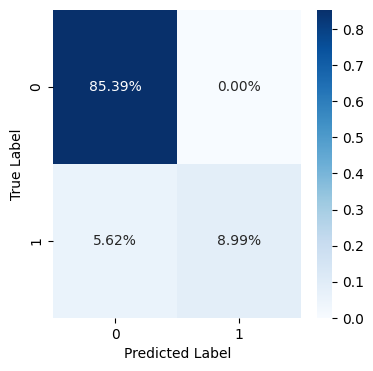

In [33]:
y_pred_dt = clf_dt.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dt)
print(classification_report(y_test,y_pred_dt))
accuracy_validation = '{}'.format(f1_score(y_test,y_pred_dt,average='macro'))
print("Macro F1 score of the Decision Trees on test dataset turns out to be " +accuracy_validation) 
fig, ax = plt.subplots(figsize=(4,4)) 
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax)
s.set(xlabel='Predicted Label', ylabel='True Label')

<h3>Task 2 </h3>

In [34]:
# Task A
# using random sampler to carry out sampling 
predictor_ROS = Predictors() 
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
predictor_ROS.fit(X_ros,y_ros)


For model SVC following are the best parametrs {'C': 0.01, 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        76
         1.0       0.77      0.77      0.77        13

    accuracy                           0.93        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.93      0.93      0.93        89

Macro F1 score of the model on test dataset turns out to be 0.8648785425101215
For model Logistic Regression following are the best parametrs {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        76
         1.0       0.92      0.85      0.88        13

    accuracy                           0.97        89
   macro avg       0.95      0.92      0.93        89
weighted avg       0.97      0.97      0.97        89

Macro F1 score of the model on test dataset turns out t

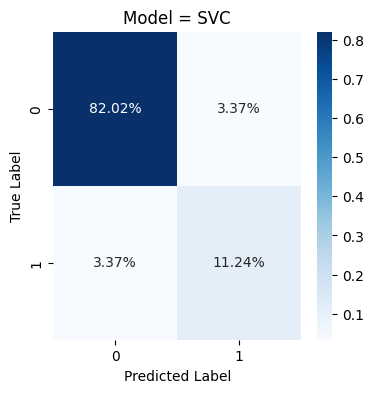

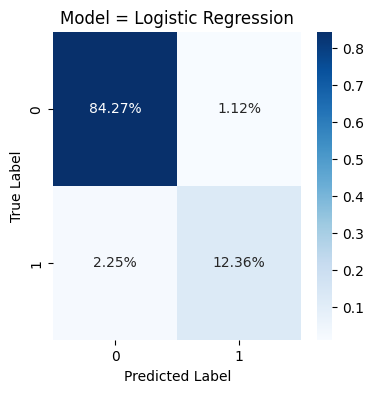

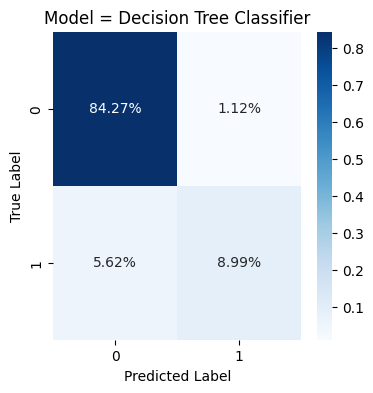

In [35]:
predictor_ROS.predict(X_test,y_test) 

For model SVC following are the best parametrs {'C': 0.01, 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        76
         1.0       0.77      0.77      0.77        13

    accuracy                           0.93        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.93      0.93      0.93        89

Macro F1 score of the model on test dataset turns out to be 0.8648785425101215
For model Logistic Regression following are the best parametrs {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        76
         1.0       0.92      0.85      0.88        13

    accuracy                           0.97        89
   macro avg       0.95      0.92      0.93        89
weighted avg       0.97      0.97      0.97        89

Macro F1 score of the model on test dataset turns out t

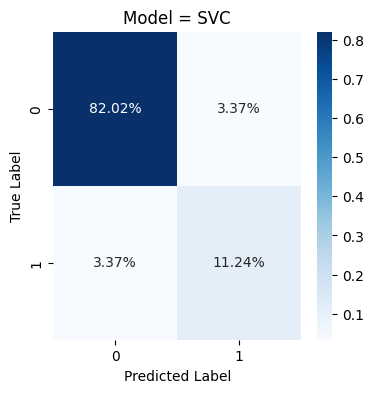

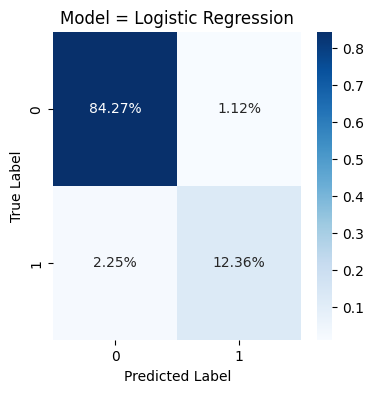

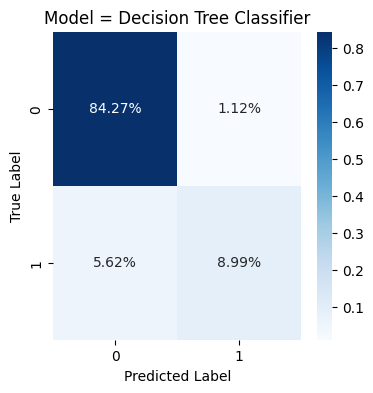

In [36]:
# Task B
# using class_weights carry out sampling 

# Assigning class weights
P = np.where(y_train == 0,(1/np.sum(y_train == 0)),(1/np.sum(y_train == 1)))
P = P / np.sum(P)
#Sampling from the X_Train and y_train depending upon class weights
samples = np.random.choice(np.arange(0, len(X_train)), p=P,size=len(X_train))
predictor_class_weight = Predictors() 
X_class_weight = X_train.iloc[samples]
y_class_weight = y_train.iloc[samples]
predictor_class_weight.fit(X_ros,y_ros)
predictor_class_weight.predict(X_test,y_test)

For model SVC following are the best parametrs {'C': 0.01, 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        76
         1.0       0.77      0.77      0.77        13

    accuracy                           0.93        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.93      0.93      0.93        89

Macro F1 score of the model on test dataset turns out to be 0.8648785425101215
For model Logistic Regression following are the best parametrs {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        76
         1.0       0.85      0.85      0.85        13

    accuracy                           0.96        89
   macro avg       0.91      0.91      0.91        89
weighted avg       0.96      0.96      0.96        89

Macro F1 score of the model on test dataset turns out 

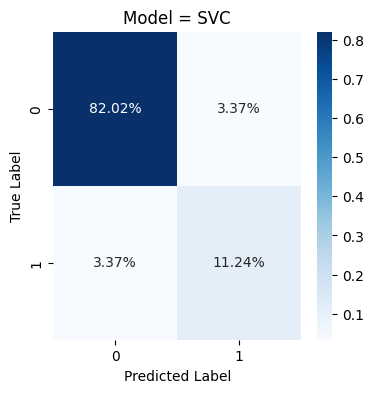

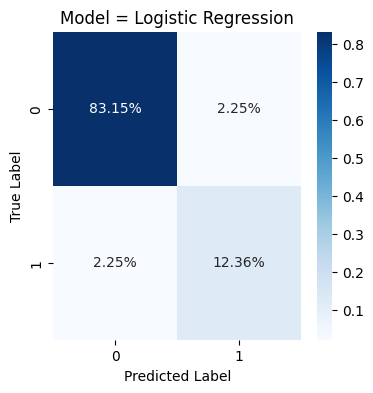

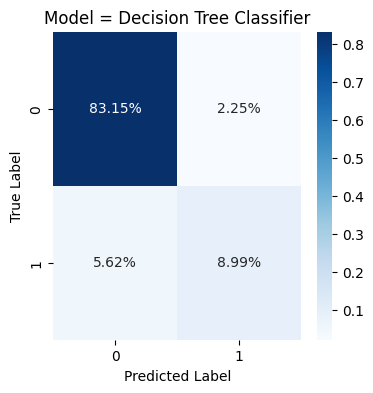

In [37]:
# Task C
# using sample_weights carry out sampling 
predictor_sample_weight = Predictors()
predictor_sample_weight.fit(X_train,y_train,sample_weight=P)
predictor_sample_weight.predict(X_test,y_test)

SMOTE :  Synthetic Minority Over-sampling Technique:<br>
Generates synthetic samples for the minority class to balance the class distribution by selecting a random number of k-nearest neighbors (typically k=5) from the minority class. These neighbors are close in feature space to the current minority class sample.
Following steps are performed by SMOTE:
<li>For each minority sample, SMOTE selects one or more of its nearest neighbors.</li>
<li>It then generates a synthetic data point along the line segment joining the minority sample and its neighbor.</li>
<li>This process is repeated for many minority class </li>

For model SVC following are the best parametrs {'C': 0.01, 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        76
         1.0       0.77      0.77      0.77        13

    accuracy                           0.93        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.93      0.93      0.93        89

Macro F1 score of the model on test dataset turns out to be 0.8648785425101215
For model Logistic Regression following are the best parametrs {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        76
         1.0       0.91      0.77      0.83        13

    accuracy                           0.96        89
   macro avg       0.94      0.88      0.90        89
weighted avg       0.95      0.96      0.95        89

Macro F1 score of the model on test dataset turns out t

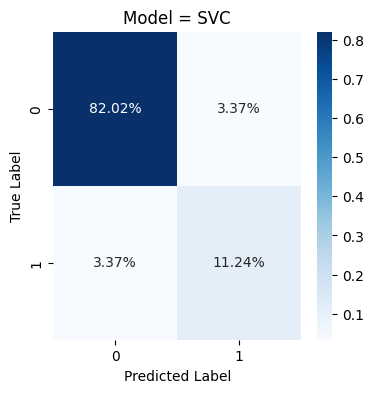

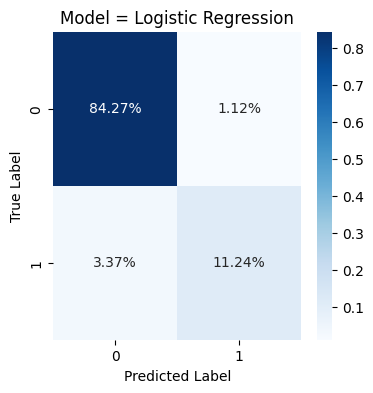

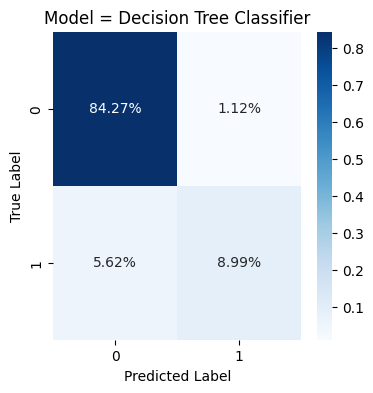

In [38]:
# Task D
# creative ideas to address the class imbalance via using SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
predictor_smote = Predictors()
predictor_smote.fit(X_smote,y_smote)
predictor_smote.predict(X_test,y_test)

<h3>Conclusion:</h3>
<li>From the values obatined from the macro - F1 score, it turns out to be clear that by addressing the class imbalance problem, the performance of best classification model has increased form 90% to 93% (for Logistic Regressor).</li>
<li>Random Sampler and class_weight sampler gives better performance than sample_weights and SMOTE sampler in regards to macro F1 score</li>